# Task 1 - Exploratory Data Analysis

This notebook will walk you through this task interactively, meaning that once you've imported this notebook into `Google Colab`, you'll be able to run individual cells of code independantly, and see the results as you go.

This notebooks is designed for users that have an understanding of Python and data analysis. There will be some helper functions and initial setup code provided, but it will be up to you to perform the analysis and to draw insights!

---

## Section 1 - Setup

First, we need to mount this notebook to our Google Drive folder, in order to access the CSV data file. If you haven't already, watch this video https://www.youtube.com/watch?v=woHxvbBLarQ to help you mount your Google Drive folder.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In order to view, analyse and manipulate the dataset, we must load it into something called a `dataframe`, which is a way of storing tabulated data in a virtual table. This dataframe will allow us to analyse the data freely. To load it into a dataframe, we will need a package called `Pandas`. We can install pandas with this command:

In [2]:
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


And now we can import this package like so:

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

---

## Section 2 - Data loading

Now that Google Drive is mounted, you can store the CSV file anywhere in your Drive and update the `path` variable below to access it within this notebook. Once we've updated the `path`, let's read this CSV file into a pandas dataframe and see what it looks like

In [4]:
path = "/content/drive/MyDrive/sample_sales_data.csv"
df = pd.read_csv(path)
df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
df.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


In [14]:
df[df['quantity'] == 0]

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type


Using the `.head()` method allows us to see the top 5 (5 by default) rows within the dataframe. We can use `.tail()` to see the bottom 5. If you want to see more than 5 rows, simply enter a number into the parentheses, e.g. `head(10)` or `tail(10)`.

---

## Section 3 - Descriptive statistics

In this section, you should try to gain a description of the data, that is: what columns are present, how many null values exist and what data types exists within each column.

To get you started an explanation of what the column names mean are provided below:

- transaction_id = this is a unique ID that is assigned to each transaction
- timestamp = this is the datetime at which the transaction was made
- product_id = this is an ID that is assigned to the product that was sold. Each product has a unique ID
- category = this is the category that the product is contained within
- customer_type = this is the type of customer that made the transaction
- unit_price = the price that 1 unit of this item sells for
- quantity = the number of units sold for this product within this transaction
- total = the total amount payable by the customer
- payment_type = the payment method used by the customer

After this, you should try to compute some descriptive statistics of the numerical columns within the dataset, such as:

- mean
- median
- count
- etc...

In [5]:
print(df.mean())
print('---------------------')
print(df.median())
print('---------------------')
print(df.count())
print('---------------------')
print(df.describe(include = 'all'))


unit_price     7.819480
quantity       2.501597
total         19.709905
dtype: float64
---------------------
unit_price     7.19
quantity       3.00
total         14.97
dtype: float64
---------------------
transaction_id    7829
timestamp         7829
product_id        7829
category          7829
customer_type     7829
unit_price        7829
quantity          7829
total             7829
payment_type      7829
dtype: int64
---------------------
                              transaction_id            timestamp  \
count                                   7829                 7829   
unique                                  7829                 7738   
top     a1c82654-c52c-45b3-8ce8-4c2a1efe63ed  2022-03-02 19:32:20   
freq                                       1                    2   
mean                                     NaN                  NaN   
std                                      NaN                  NaN   
min                                      NaN                  NaN   


<ipython-input-5-137ab5feee75>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.mean())
<ipython-input-5-137ab5feee75>:3: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.median())


---

## Section 4 - Visualisation

Now that you've computed some descriptive statistics of the dataset, let's create some visualisations. You may use any package that you wish for visualisation, however, some helper functions have been provided that make use of the `seaborn` package. If you wish to use these helper functions, ensure to run the below cells that install and import `seaborn`.

In [6]:

!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
import seaborn as sns

To analyse the dataset, below are snippets of code that you can use as helper functions to visualise different columns within the dataset. They include:

- plot_continuous_distribution = this is to visualise the distribution of numeric columns
- get_unique_values = this is to show how many unique values are present within a column
- plot_categorical_distribution = this is to visualise the distribution of categorical columns
- correlation_plot = this is to plot the correlations between the numeric columns within the data

In [24]:
def plot_continuous_distribution(data: pd.DataFrame = None, column: str = None, height: int = 8):
  _ = sns.displot(data, x=column, kde=True, height=height, aspect=height/5).set(title=f'Distribution of {column}');

def get_unique_values(data, column):
  num_unique_values = len(data[column].unique())
  value_counts = data[column].value_counts()
  print(f"Column: {column} has {num_unique_values} unique values\n")
  print(value_counts)

def plot_categorical_distribution(data: pd.DataFrame = None, column: str = None, height: int = 8, aspect: int = 2):
  _ = sns.catplot(data=data, x=column, kind='count', height=height, aspect=aspect).set(title=f'Distribution of {column}');
  plt.xticks(rotation=45)
  plt.show()

def correlation_plot(data: pd.DataFrame = None):
  corr = df.corr()
  sns.heatmap(corr)

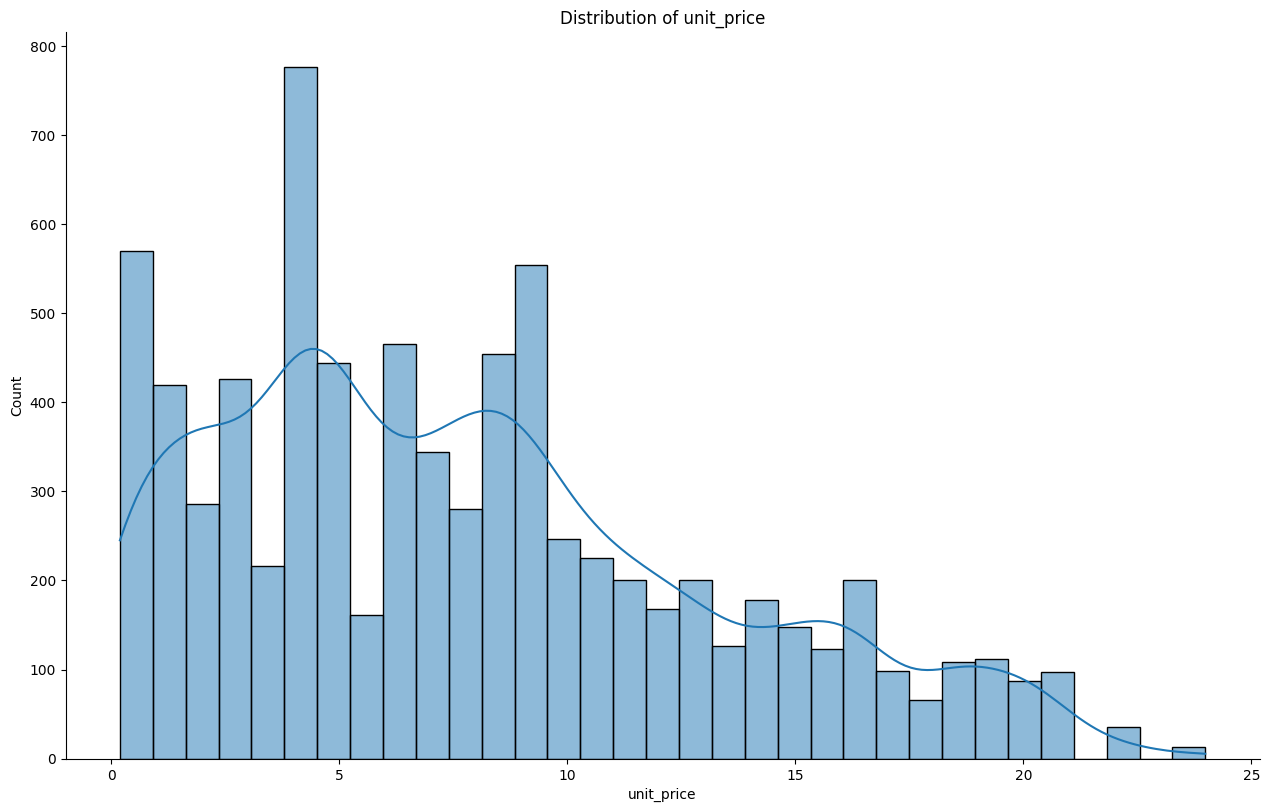

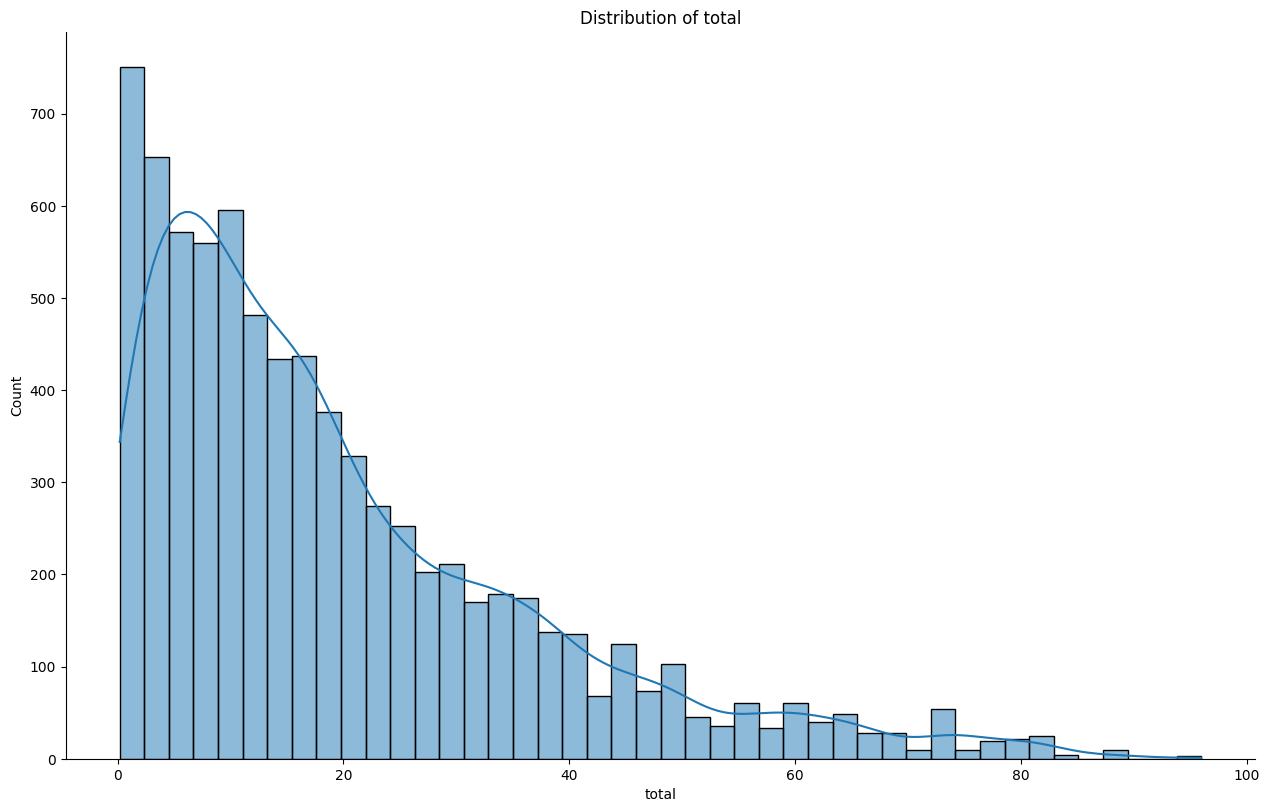

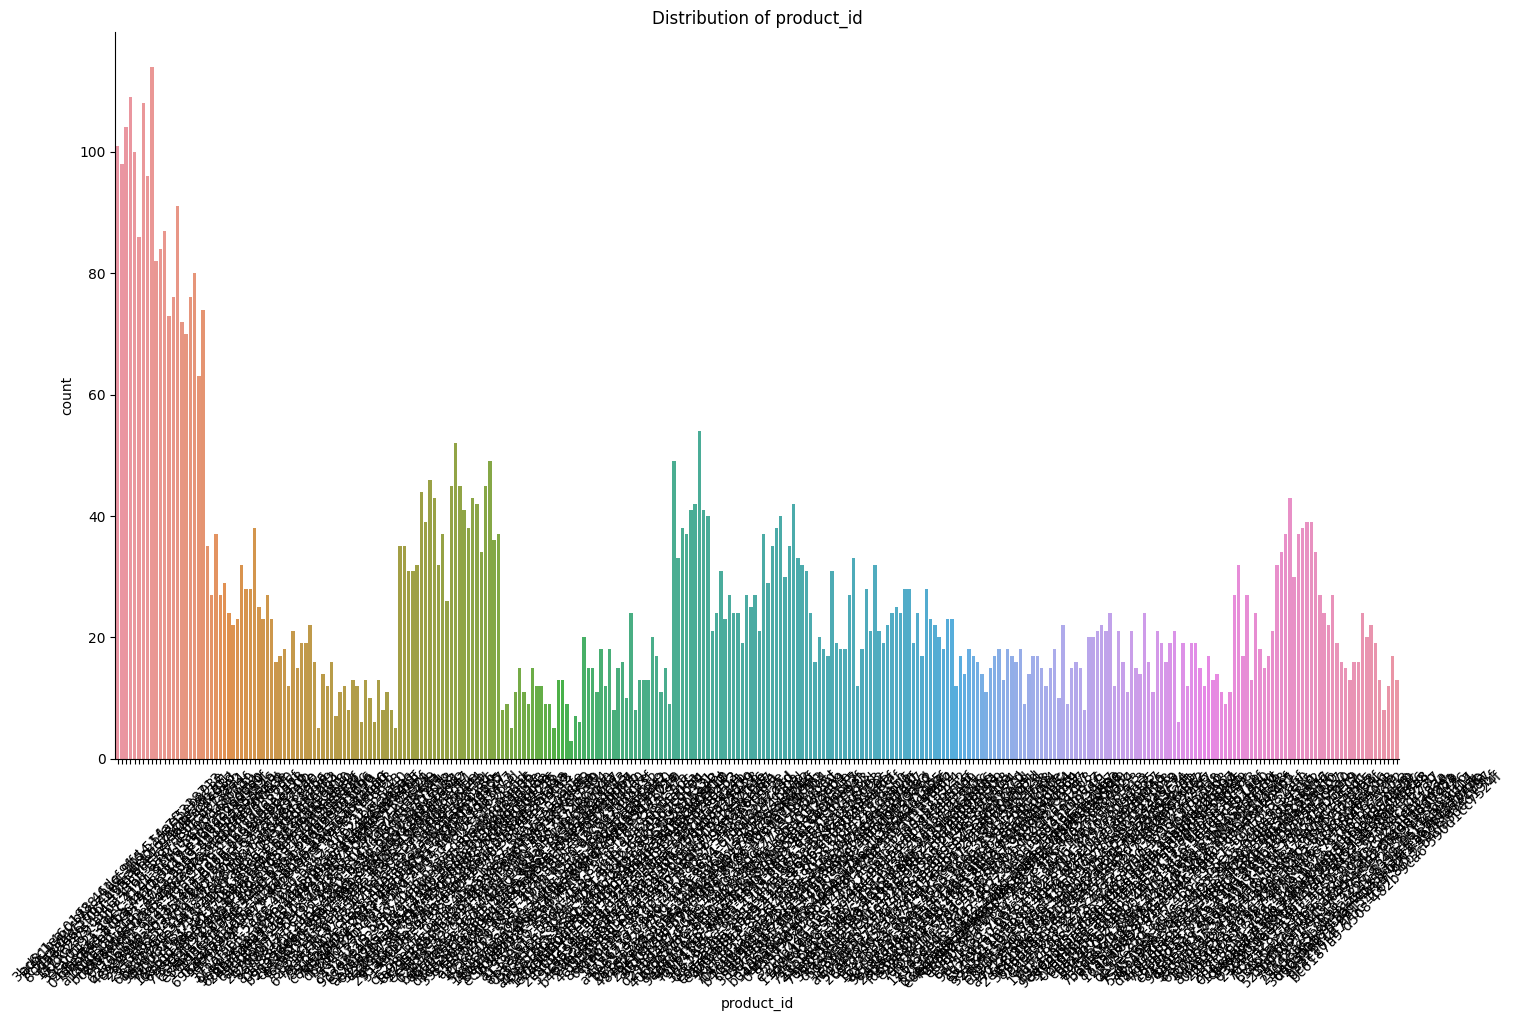

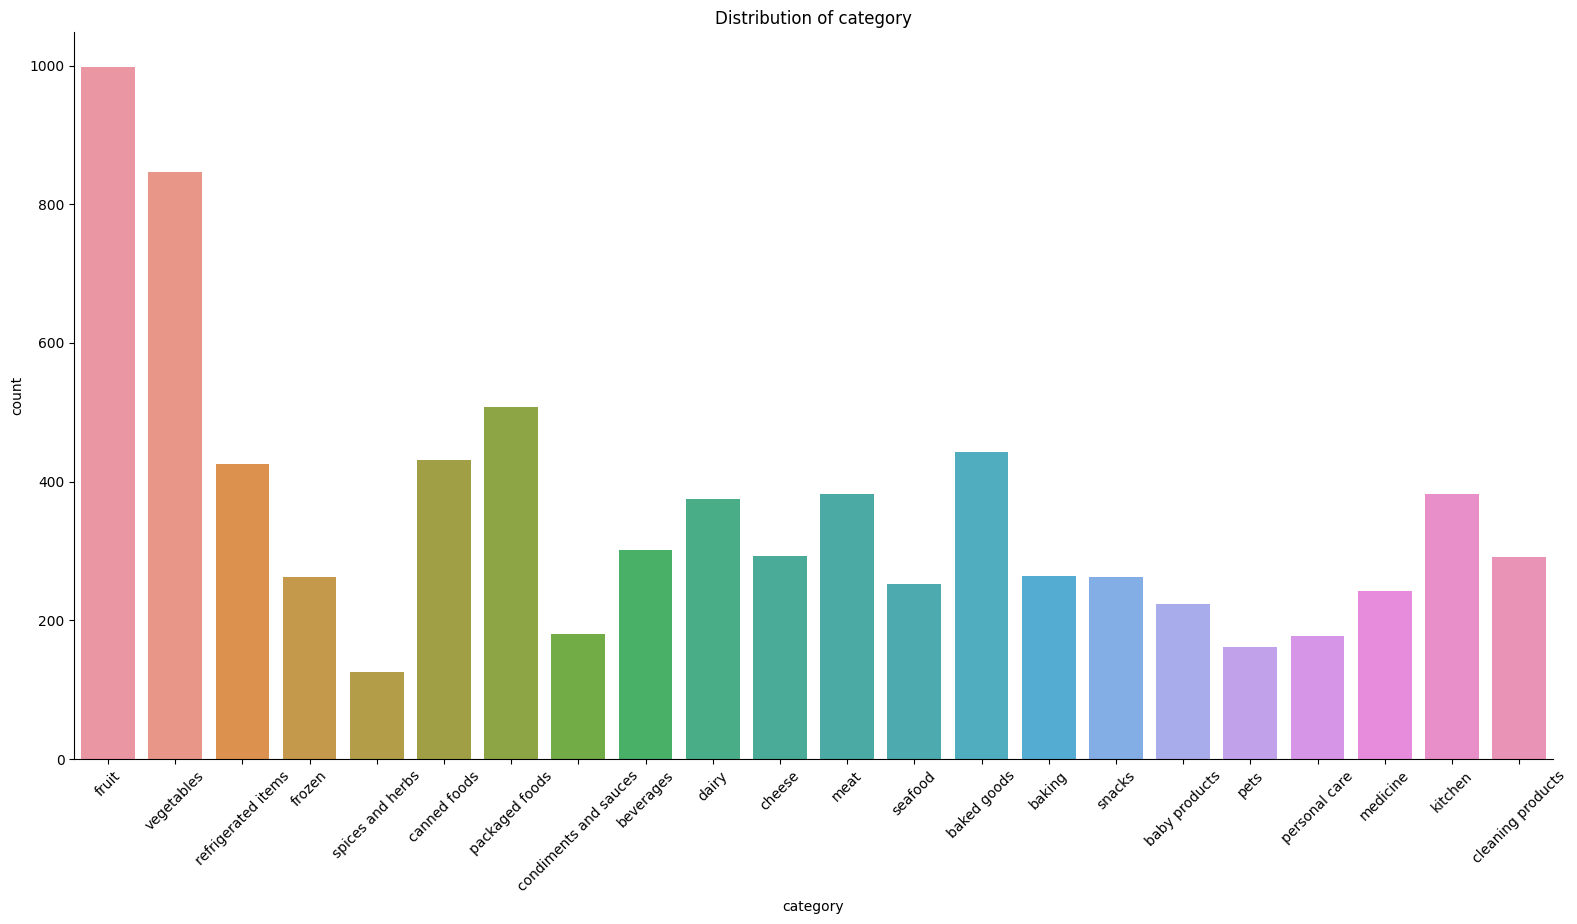

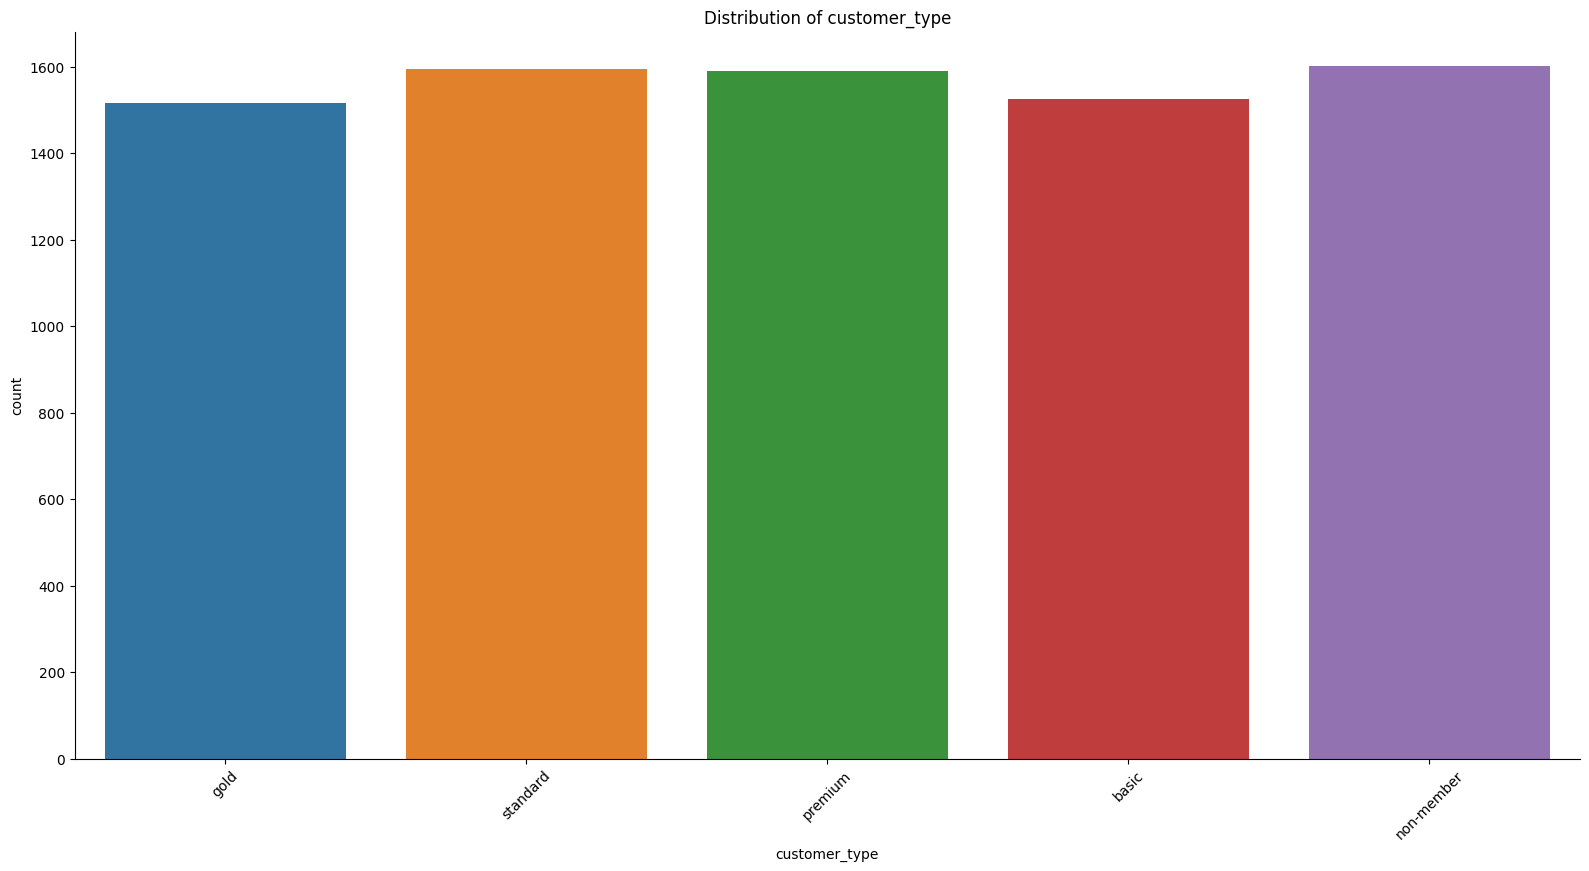

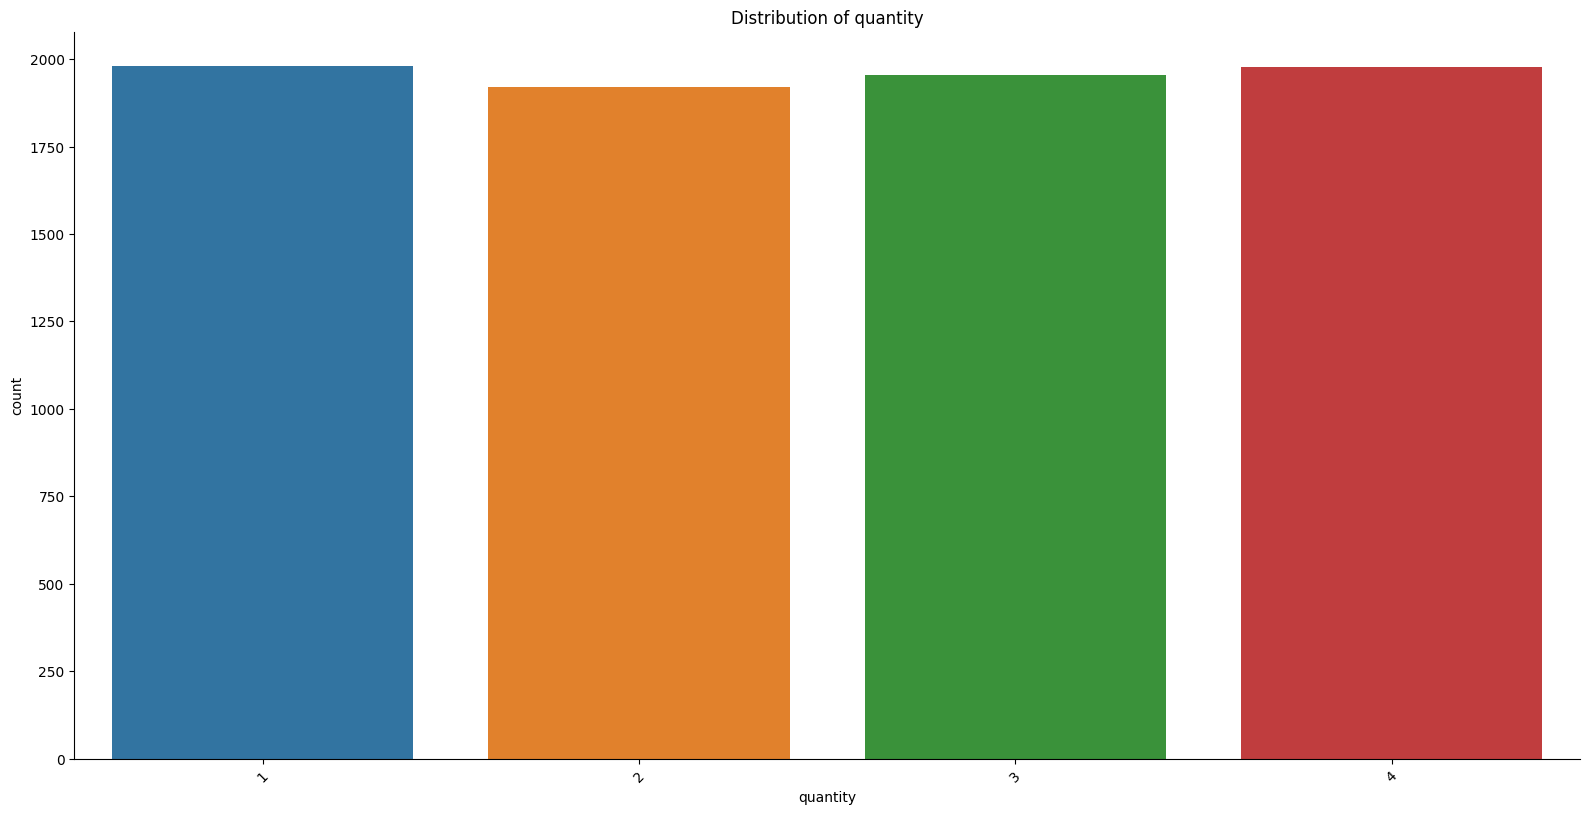

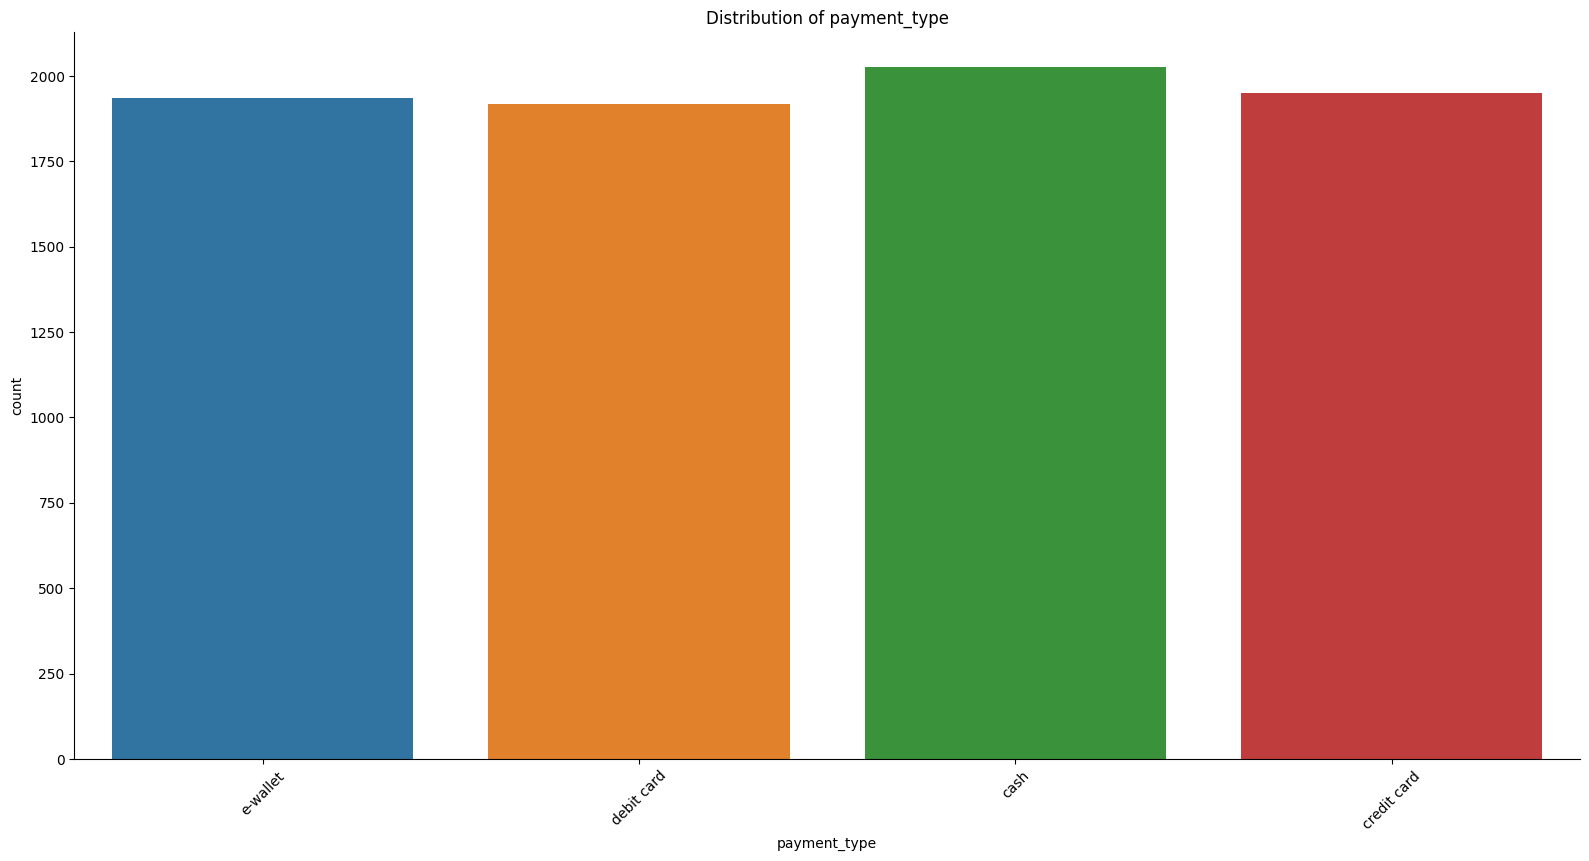

In [25]:
plot_continuous_distribution(df,'unit_price')
plot_continuous_distribution(df,'total')
plot_categorical_distribution(df,'product_id')
plot_categorical_distribution(df,'category')
plot_categorical_distribution(df,'customer_type')
plot_categorical_distribution(df,'quantity')
plot_categorical_distribution(df,'payment_type')


In [10]:
for i in df.columns:
  get_unique_values(df,i)

Column: transaction_id has 7829 unique values

a1c82654-c52c-45b3-8ce8-4c2a1efe63ed    1
6532e258-95fd-4eb5-8c67-2bfb879a8fec    1
6fce2af3-47a0-4755-99c9-0cefb5ab6f41    1
6476e388-3990-471f-b415-3ee59ae18832    1
10afe89b-c45b-49a2-b0be-dec89a4c3f80    1
                                       ..
a9abe5ac-99d5-4d8b-bbbd-c2a207642849    1
6b0b23e8-412b-4665-8cc4-3e37f0d9e195    1
711a4162-1985-4f5a-94ca-137cfacaeadf    1
7d1e9010-dbaf-4770-a467-f31477910f7a    1
afd70b4f-ee21-402d-8d8f-0d9e13c2bea6    1
Name: transaction_id, Length: 7829, dtype: int64
Column: timestamp has 7738 unique values

2022-03-02 19:32:20    2
2022-03-05 10:11:33    2
2022-03-01 18:12:17    2
2022-03-03 13:28:14    2
2022-03-07 17:13:29    2
                      ..
2022-03-01 10:00:58    1
2022-03-02 11:05:58    1
2022-03-04 17:48:49    1
2022-03-04 14:53:27    1
2022-03-06 13:50:36    1
Name: timestamp, Length: 7738, dtype: int64
Column: product_id has 300 unique values

ecac012c-1dec-41d4-9ebd-56fb7166f6d9   

<ipython-input-8-4d7f7933c6a6>:14: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


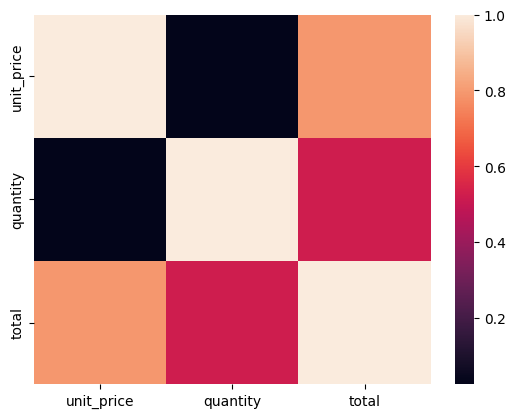

In [11]:
correlation_plot(df)

In [12]:
pd.set_option('display.max_rows', None)
df.groupby(['category','unit_price','quantity']).count()

transaction_id  timestamp  \
category              unit_price quantity                              
baby products         7.19       1                      3          3   
                                 2                      7          7   
                                 3                      5          5   
                                 4                      6          6   
                      8.19       1                      4          4   
                                 2                     10         10   
                                 3                      3          3   
                                 4                      4          4   
                      9.99       1                      3          3   
                                 2                      3          3   
                                 3                      1          1   
                                 4                      4          4   
                      10.19      1                      5          5   
                                 2                      4          4   
                                 3                      2          2   
                                 4                      1          1   
                      12.19      1                      9          9   
                                 2                      6          6   
                                 3                      4          4   
                                 4                      2          2   
                      12.49      1                      4          4   
                                 2                      5          5   
                                 3                      6          6   
                                 4                      5          5   
                      12.99      1                      6          6   
                                 2                      7          7   
                                 3                      7          7   
                                 4                      2          2   
                      13.49      1                      7          7   
                                 2                      9          9   
                                 3                      3          3   
                                 4                      5          5   
                      14.19      1                      7          7   
                                 2                      5          5   
                                 3                      3          3   
                                 4                      6          6   
                      14.99      1                      3          3   
                                 2                      3          3   
                                 3                      4          4   
                                 4                     10         10   
                      15.19      1                      3          3   
                                 2                      4          4   
                                 3                      5          5   
                                 4                      3          3   
                      15.99      1                      3          3   
                                 2                      4          4   
                                 3                      5          5   
                                 4                      4          4   
baked goods           4.19       1                     18         18   
                                 2                     17         17   
                                 3                     12         12   
                                 4                     13         13   
                      4.99       1                     14         14   
                                 2                      6          6   
           

Now it is your chance to visualise the columns, give it your best shot! As well as simply visualising the columns, try to interpret what the results mean in the context of the client.

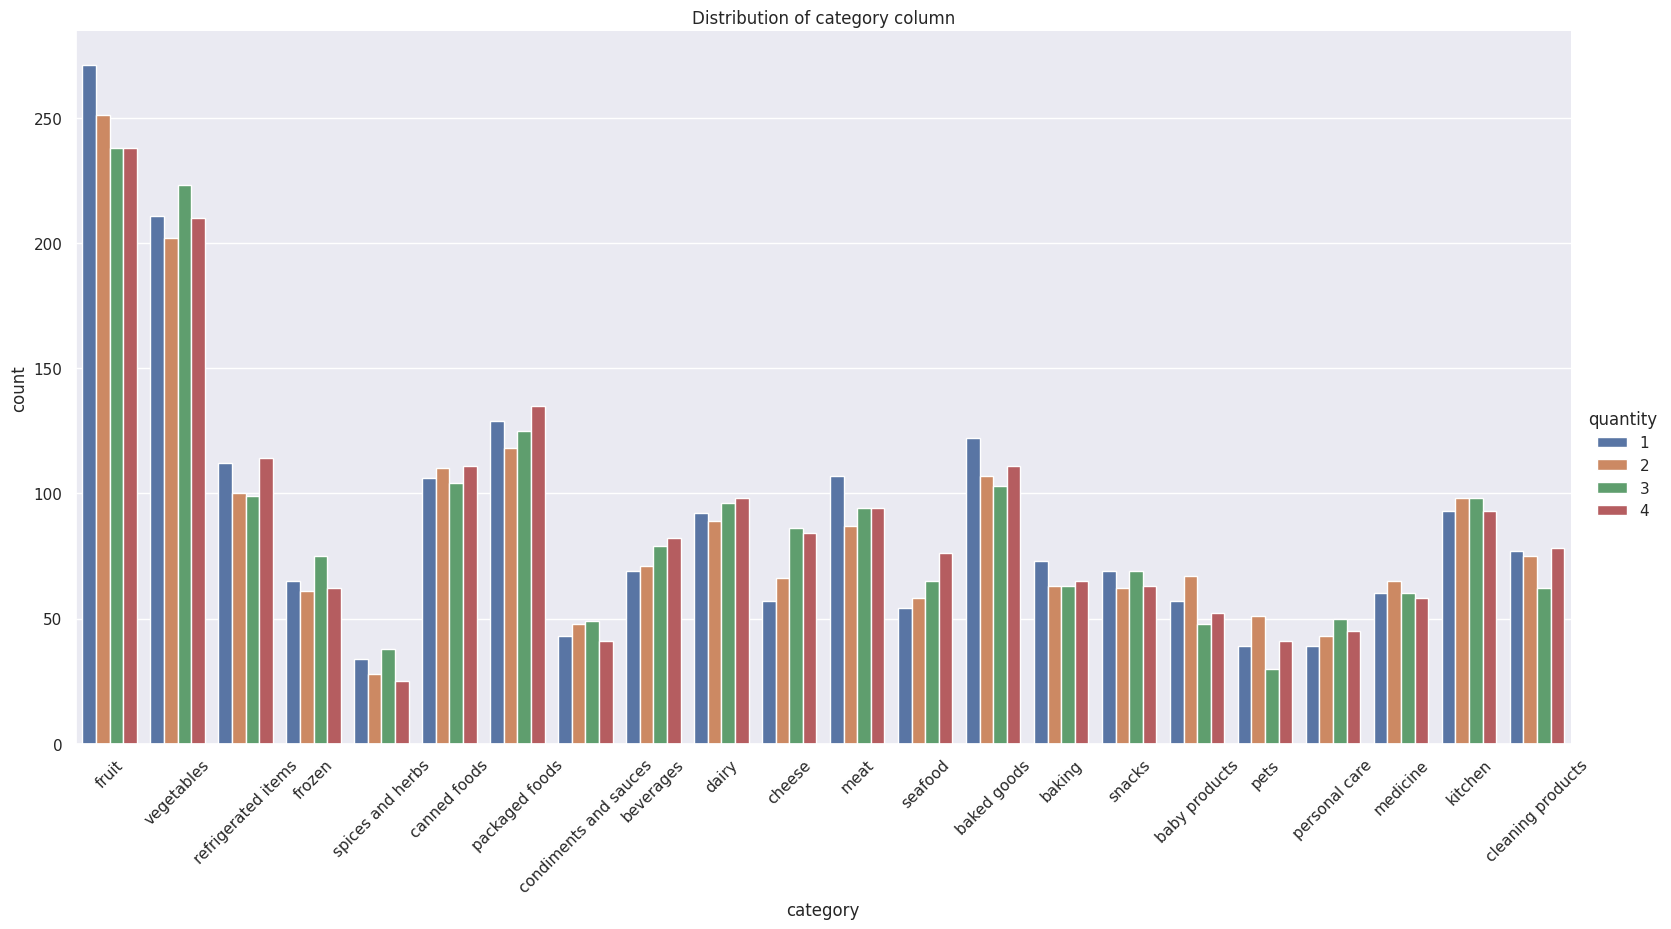

In [42]:
sns.catplot(data=df, x='category', kind='count',hue='quantity', height=8, aspect=2).set(title=f'Distribution of category column')
plt.xticks(rotation=45)
plt.show()

In [28]:
mean_df = pd.DataFrame(df.groupby(['category']).mean()).reset_index()
mean_df

<ipython-input-28-a72a2f6345b1>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_df = pd.DataFrame(df.groupby(['category']).mean()).reset_index()


,category,unit_price,quantity,total
0,baby products,12.285536,2.424107,29.932902
1,baked goods,7.619797,2.458239,18.844718
2,baking,5.342273,2.454545,13.075076
3,beverages,12.624551,2.578073,32.992159
4,canned foods,6.269350,2.510441,15.646125
5,cheese,8.651775,2.672355,23.417304
6,cleaning products,12.802671,2.482877,32.478596
7,condiments and sauces,6.886685,2.486188,17.191160
8,dairy,7.980133,2.533333,20.137600
9,frozen,10.071369,2.509506,25.057414


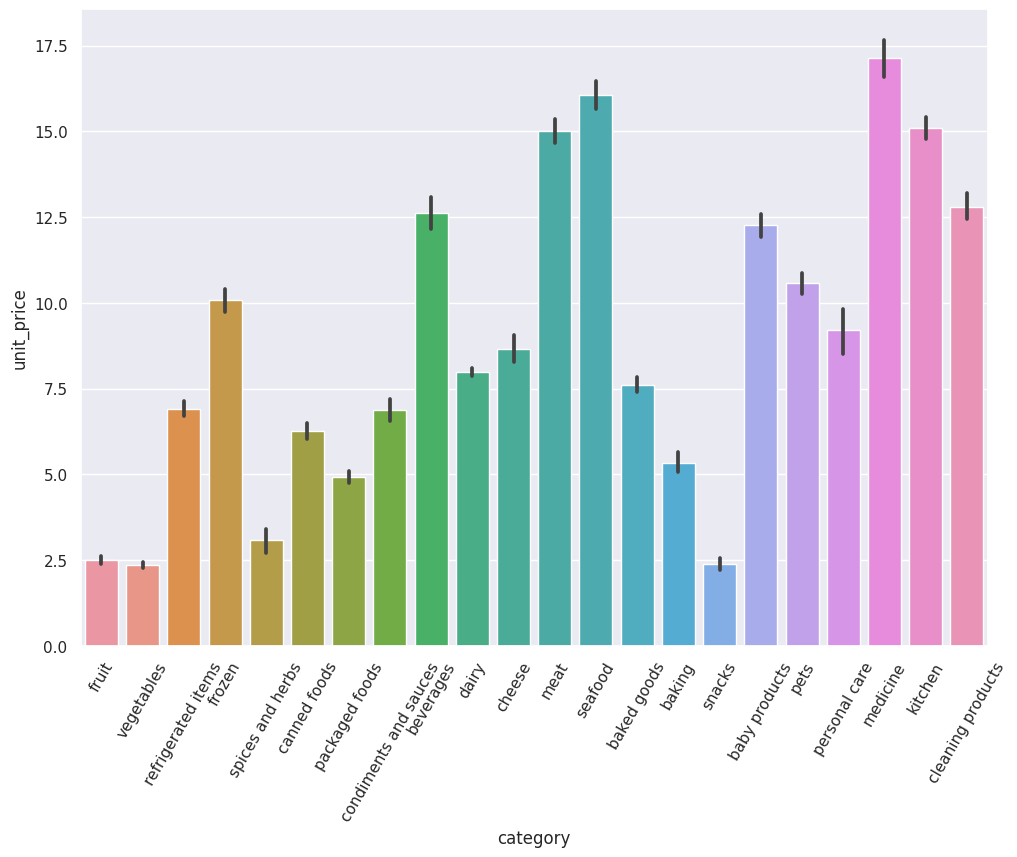

In [41]:
sns.barplot(data=df, x="category", y="unit_price")
plt.xticks(rotation=60)
plt.show()

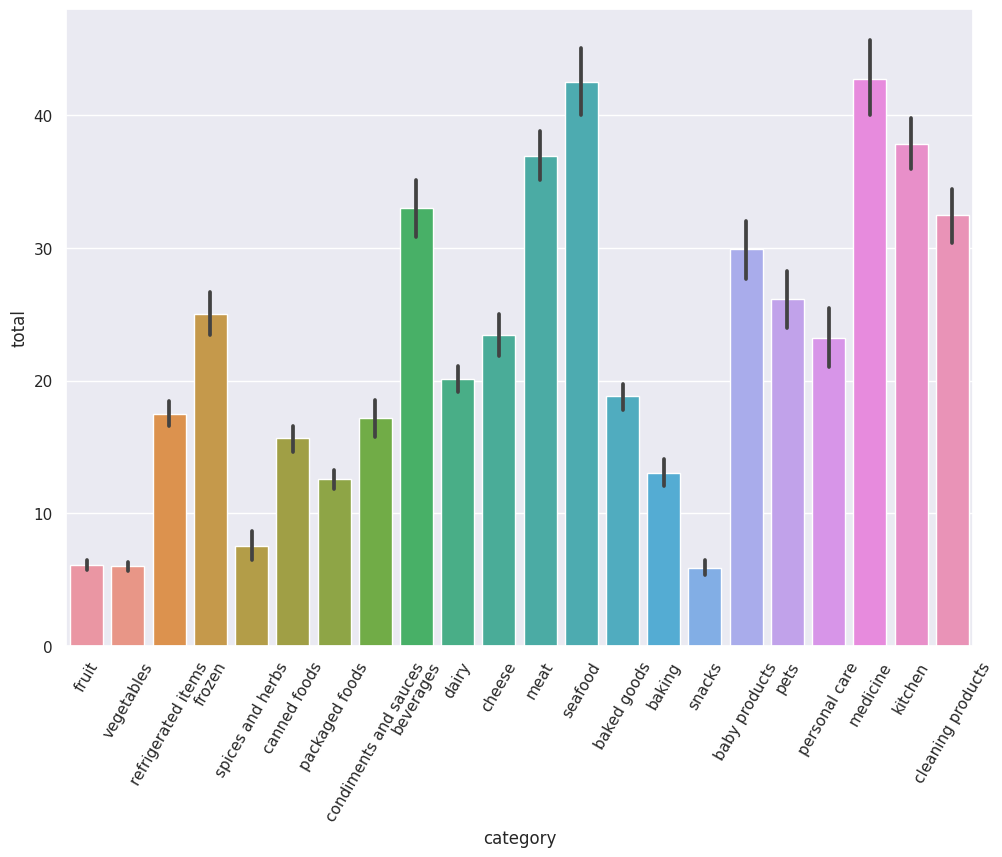

In [37]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(data=df, x="category", y="total")
plt.xticks(rotation=60)
plt.show()

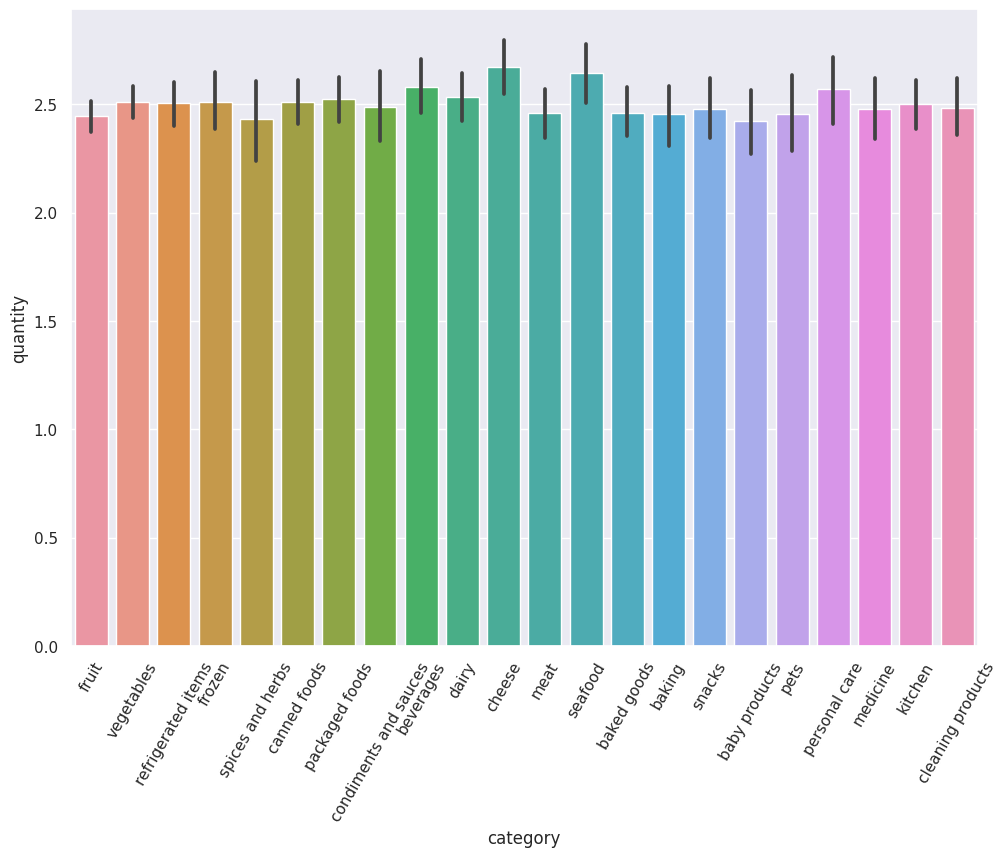

In [40]:
sns.barplot(data=df, x="category", y="quantity")
plt.xticks(rotation=60)
plt.show()

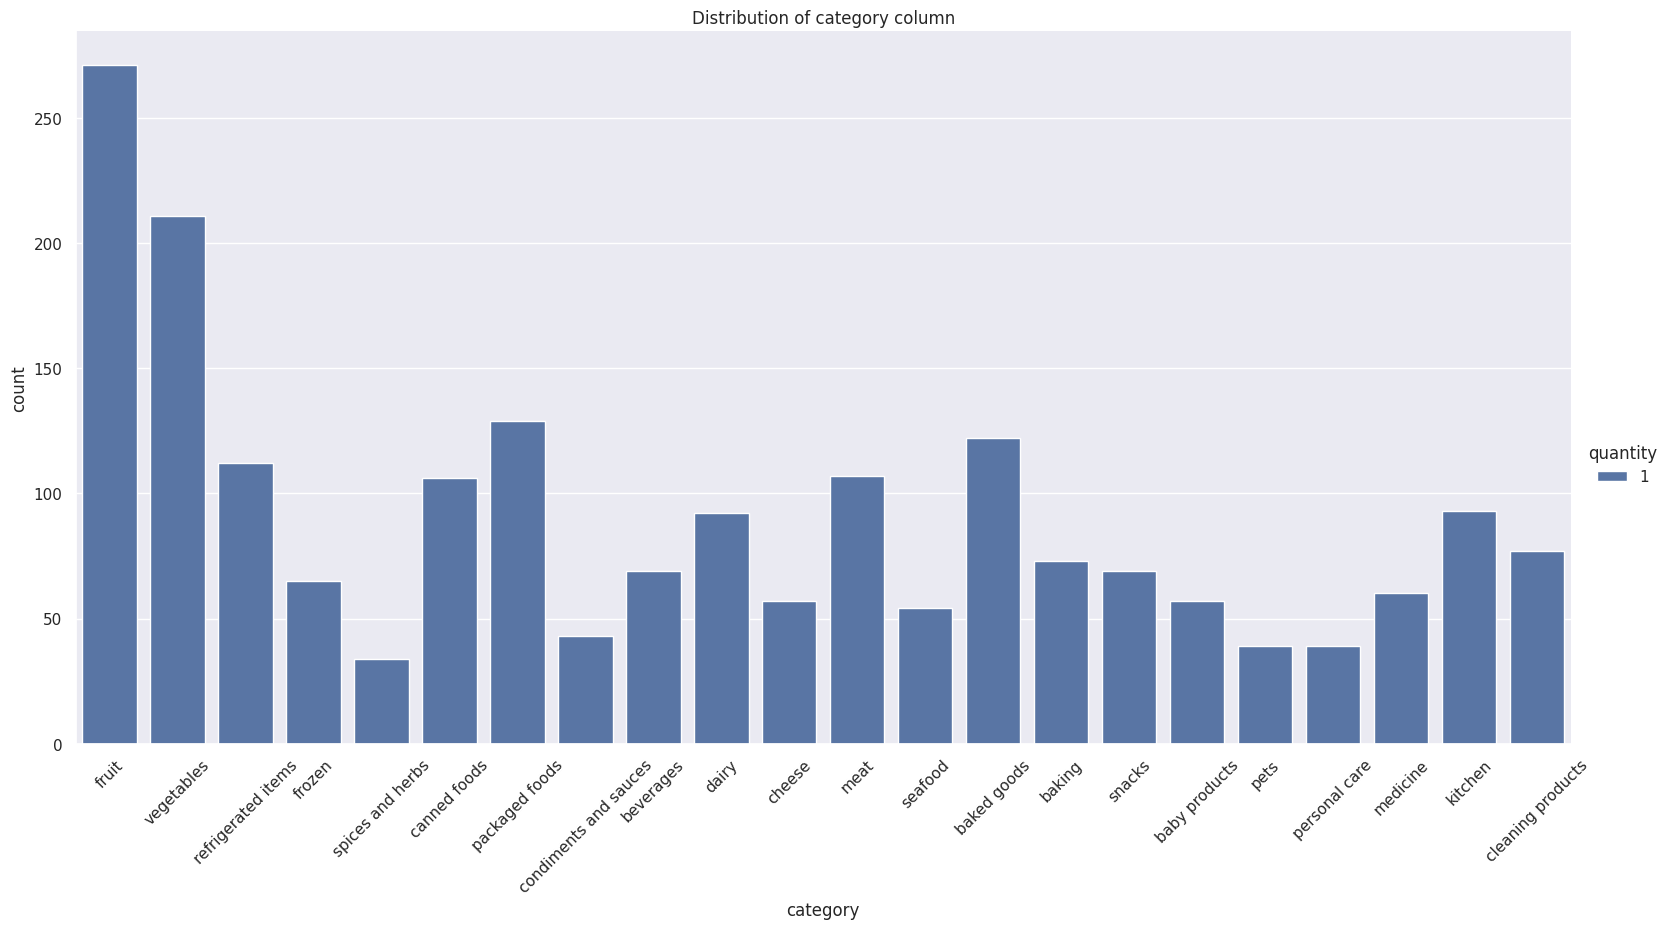

In [43]:
sns.catplot(data=df[df['quantity']==1], x='category', kind='count',hue='quantity', height=8, aspect=2).set(title=f'Distribution of category column')
plt.xticks(rotation=45)
plt.show()

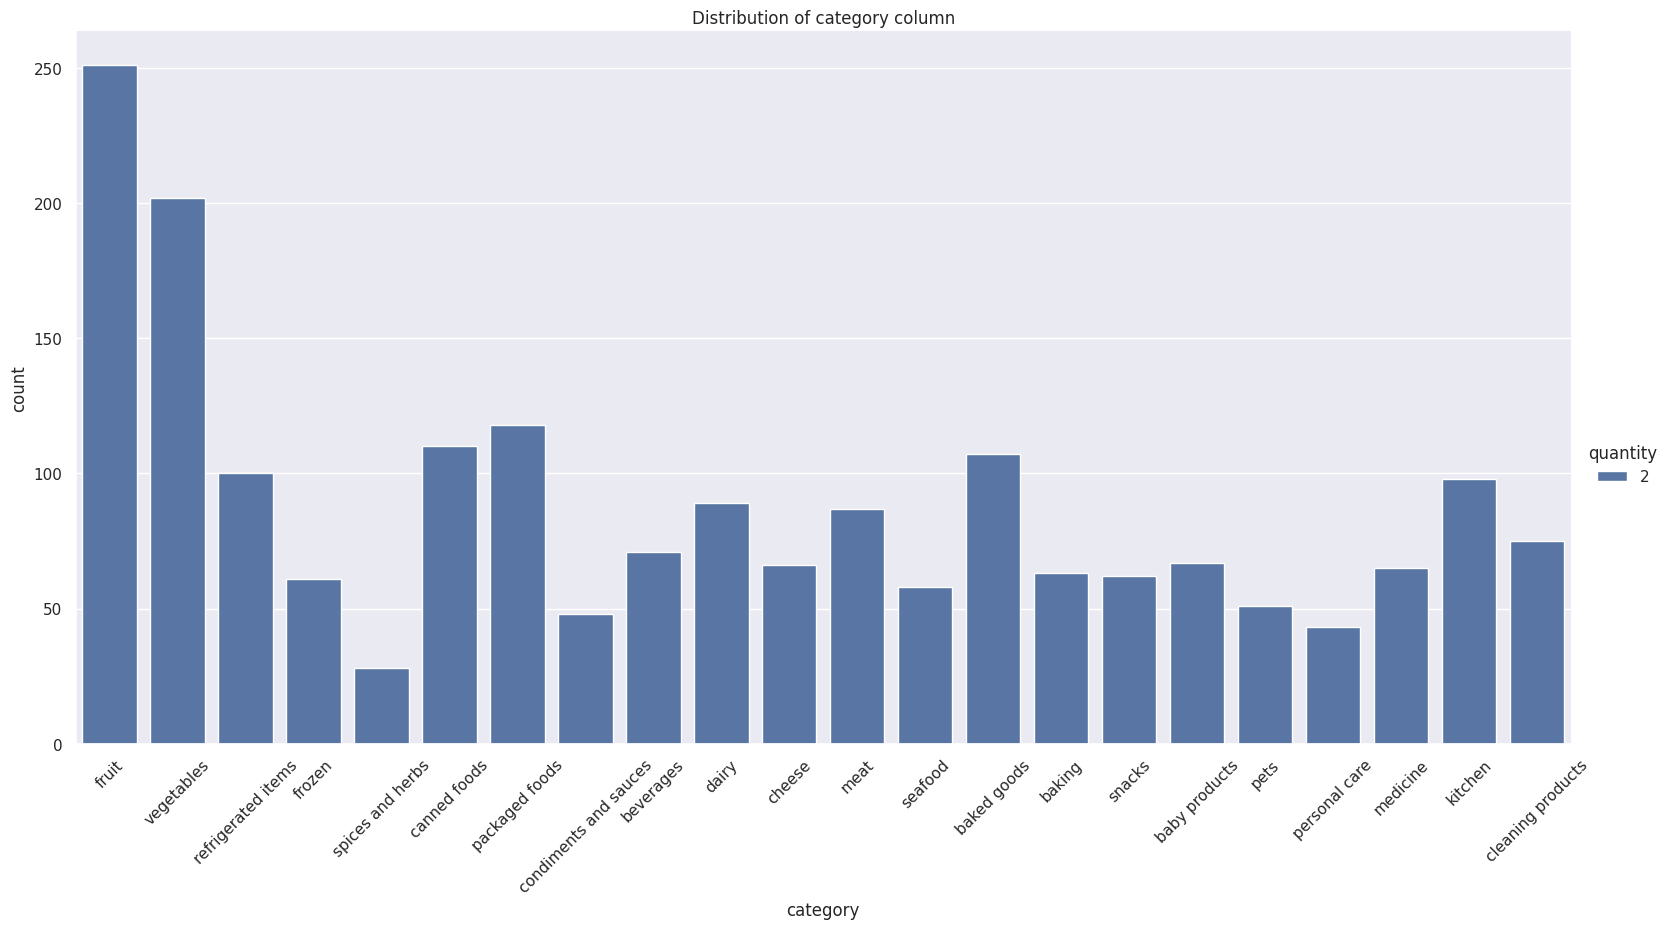

In [44]:
sns.catplot(data=df[df['quantity']==2], x='category', kind='count',hue='quantity', height=8, aspect=2).set(title=f'Distribution of category column')
plt.xticks(rotation=45)
plt.show()

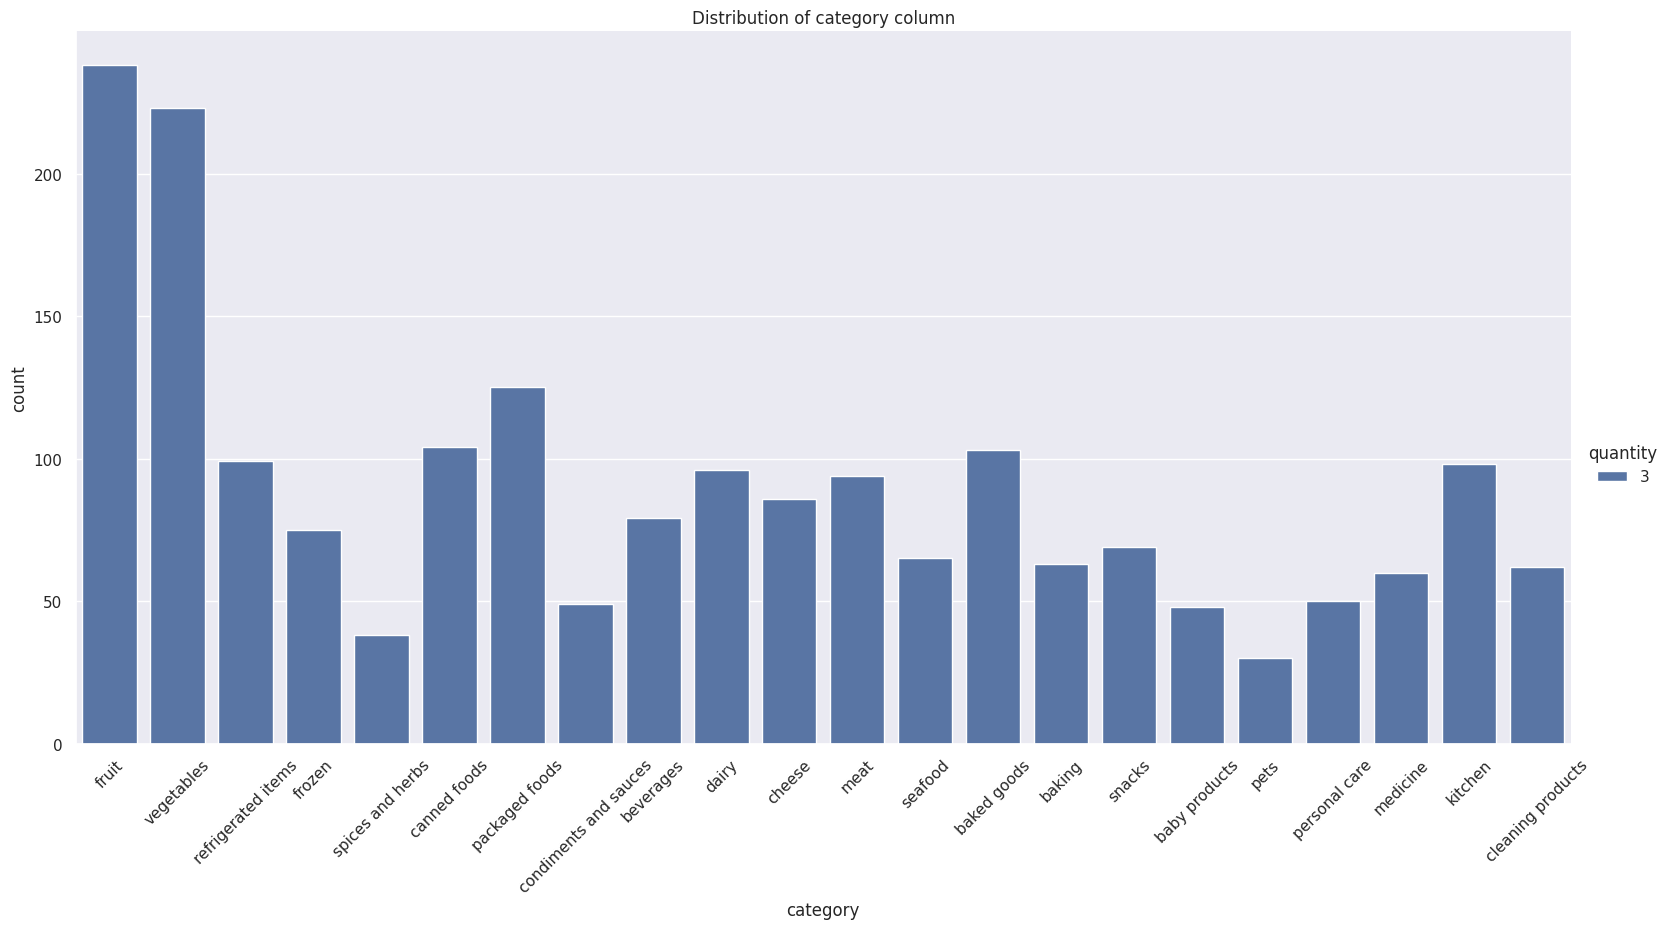

In [45]:
sns.catplot(data=df[df['quantity']==3], x='category', kind='count',hue='quantity', height=8, aspect=2).set(title=f'Distribution of category column')
plt.xticks(rotation=45)
plt.show()

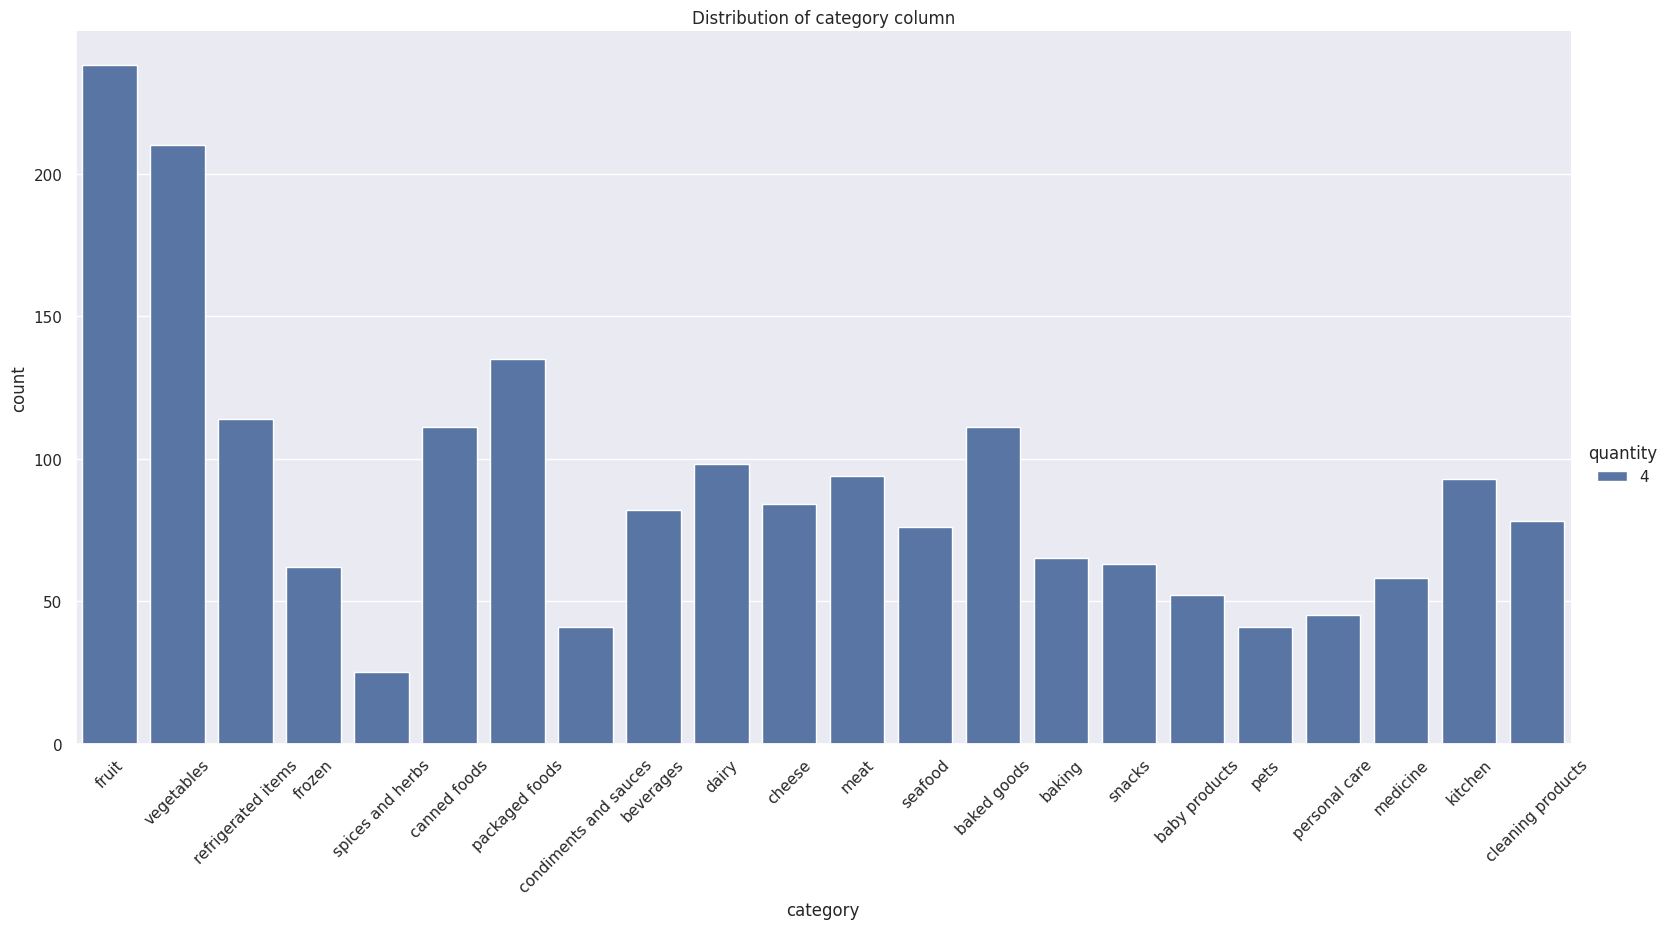

In [46]:
sns.catplot(data=df[df['quantity']==4], x='category', kind='count',hue='quantity', height=8, aspect=2).set(title=f'Distribution of category column')
plt.xticks(rotation=45)
plt.show()

In [56]:
df[(3<df['unit_price']) & (df['unit_price']<4)]['category'].value_counts()

fruit                    307
refrigerated items        62
packaged foods            52
snacks                    37
baking                    34
canned foods              31
spices and herbs          25
condiments and sauces     23
personal care             19
Name: category, dtype: int64

In [57]:
df['category'].value_counts()

fruit                    998
vegetables               846
packaged foods           507
baked goods              443
canned foods             431
refrigerated items       425
kitchen                  382
meat                     382
dairy                    375
beverages                301
cheese                   293
cleaning products        292
baking                   264
snacks                   263
frozen                   263
seafood                  253
medicine                 243
baby products            224
condiments and sauces    181
personal care            177
pets                     161
spices and herbs         125
Name: category, dtype: int64

In [60]:
df[df['category'] == 'spices and herbs']['unit_price'].value_counts()

4.99    21
0.49    18
0.19    18
3.99    13
4.19    12
3.49    12
5.49    11
2.19     8
5.19     6
2.49     6
Name: unit_price, dtype: int64

In [61]:
df['unit_price'].value_counts()

3.99     374
4.99     374
1.49     321
0.49     306
8.19     272
8.99     272
0.19     264
2.49     251
7.19     235
4.49     230
9.49     211
1.99     204
5.99     192
7.49     185
8.49     182
2.99     175
4.19     173
5.49     161
6.49     156
3.49     149
10.19    142
16.19    142
10.99    129
6.19     117
14.99    116
12.49    113
11.19    110
6.99     109
18.49    109
11.99    106
9.99     105
1.19      99
10.49     96
7.99      95
14.19     94
11.49     90
12.99     87
2.19      82
20.49     80
13.19     76
19.99     76
15.49     74
9.19      71
5.19      70
3.19      67
12.19     62
16.49     58
16.99     56
18.19     54
14.49     51
13.49     50
15.99     49
19.19     42
17.19     42
18.99     39
13.99     33
15.19     32
19.49     31
22.19     18
21.99     17
20.99     17
23.99     13
17.99     12
20.19     11
Name: unit_price, dtype: int64

In [63]:
df[df['unit_price'] > 15]['category'].value_counts()

kitchen              230
meat                 183
seafood              157
medicine             142
beverages            115
cleaning products     91
baby products         31
personal care         23
Name: category, dtype: int64

In [64]:
df[df['unit_price'] == 23.99]['category'].value_counts()

medicine    13
Name: category, dtype: int64

---

## Section 5 - Summary

We have completed an initial exploratory data analysis on the sample of data provided. We should now have a solid understanding of the data.

The client wants to know

```
"How to better stock the items that they sell"
```

From this dataset, it is impossible to answer that question. In order to make the next step on this project with the client, it is clear that:

- We need more rows of data. The current sample is only from 1 store and 1 week worth of data
- We need to frame the specific problem statement that we want to solve. The current business problem is too broad, we should narrow down the focus in order to deliver a valuable end product
- We need more features. Based on the problem statement that we move forward with, we need more columns (features) that may help us to understand the outcome that we're solving for

